In [4]:
import pandas as pd
import numpy as np

# What is a Dataframe?
A DataFrame is a 2-dimensional labeled data structure.

Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.)

In [9]:
Movies_df = {'Title':['Fantastic Beasts and Where to Find Them', 'Moana', 'Interstellar'],
            'Genre':['Adventure,Family', 'Animation,Adventure','Drama,Sci-Fi'],
            'Year':[2016, 2016, 2014]}

In [10]:
Movies_df = pd.DataFrame(Movies_df)

In [11]:
Movies_df

,Title,Genre,Year
0,Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
1,Moana,"Animation,Adventure",2016
2,Interstellar,"Drama,Sci-Fi",2014


# Indexing

In [12]:
Movies_df

,Title,Genre,Year
0,Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
1,Moana,"Animation,Adventure",2016
2,Interstellar,"Drama,Sci-Fi",2014


Index is like an address, that's how any data point across the dataframe or series can be accessed. Rows and columns both have indexes, rows indices are called as index and for columns its general column names.

## Set the DataFrame index using existing columns.

In [13]:
Movies_df.set_index('Title')

,Genre,Year
Title,,
Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
Moana,"Animation,Adventure",2016
Interstellar,"Drama,Sci-Fi",2014


If we look at the dataframe again, the changes are not applied. pandas usually doesn't apply the changes you make inplace, to avoid undesirable changes to the original dataframe. 

In [14]:
Movies_df

,Title,Genre,Year
0,Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
1,Moana,"Animation,Adventure",2016
2,Interstellar,"Drama,Sci-Fi",2014


In [15]:
#add inplace = True to modify the original df
Movies_df.set_index('Title', inplace=True)

In [16]:
Movies_df

,Genre,Year
Title,,
Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
Moana,"Animation,Adventure",2016
Interstellar,"Drama,Sci-Fi",2014


In [17]:
Movies_df.index

Index(['Fantastic Beasts and Where to Find Them', 'Moana', 'Interstellar'], dtype='object', name='Title')

## Difference btw .loc[] and .iloc[]

In [18]:
Movies_df.iloc[2]

Genre    Drama,Sci-Fi
Year             2014
Name: Interstellar, dtype: object

In [19]:
Movies_df.loc['Moana']

Genre    Animation,Adventure
Year                    2016
Name: Moana, dtype: object

In [20]:
Movies_df.loc['Moana', 'Genre']

'Animation,Adventure'

In [21]:
Movies_df.iloc[0]

Genre    Adventure,Family
Year                 2016
Name: Fantastic Beasts and Where to Find Them, dtype: object

In [22]:
Movies_df.iloc[[0,1]]

,Genre,Year
Title,,
Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
Moana,"Animation,Adventure",2016


## Sort index alphabetically

In [23]:
Movies_df.sort_index()

,Genre,Year
Title,,
Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
Interstellar,"Drama,Sci-Fi",2014
Moana,"Animation,Adventure",2016


In [24]:
Movies_df.sort_index(ascending=False)

,Genre,Year
Title,,
Moana,"Animation,Adventure",2016
Interstellar,"Drama,Sci-Fi",2014
Fantastic Beasts and Where to Find Them,"Adventure,Family",2016


#### reset index
Reset the index of the DataFrame, and use the default one instead.

In [25]:
Movies_df.reset_index(inplace=True)

In [26]:
Movies_df

,Title,Genre,Year
0,Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
1,Moana,"Animation,Adventure",2016
2,Interstellar,"Drama,Sci-Fi",2014


#### Set index when loading the dataset:
Our data set has a unique identifier that can be used as an index (Rank). We can specify the Rank variable as the index when loading the data:
    
    df = pd.read_csv('datasets_1474_2639_IMDB-Movie-Data.csv', index_col='Rank')

# Append a dataframe to an existing one
I'm using smaller dataframes so we can see the differences!<br>
.append() Appends rows of `other` to the end of this frame, returning a new
object. Columns not in this frame are added as new columns.<br>
For more info please check: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [74]:
#the existing one:
Movies_df

,Title,Genre,Year
0,Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
1,Moana,"Animation,Adventure",2016
2,Interstellar,"Drama,Sci-Fi",2014


In [75]:
#Create a new dataframe
Movies_df_2 = {'Title':['Cars', 'Despicable Me'],
            'Genre':['Animation,Adventure','Animation,Adventure,Comedy'],
            'Year':[2006, 2010]}

In [76]:
Movies_df_2 = pd.DataFrame(Movies_df_2)

In [77]:
#dataframe to add
Movies_df_2

,Title,Genre,Year
0,Cars,"Animation,Adventure",2006
1,Despicable Me,"Animation,Adventure,Comedy",2010


In [78]:
Movies_df_3 = Movies_df.append(Movies_df_2, ignore_index=True)

In [79]:
Movies_df_3

,Title,Genre,Year
0,Fantastic Beasts and Where to Find Them,"Adventure,Family",2016
1,Moana,"Animation,Adventure",2016
2,Interstellar,"Drama,Sci-Fi",2014
3,Cars,"Animation,Adventure",2006
4,Despicable Me,"Animation,Adventure,Comedy",2010


# Aggregating and Grouping
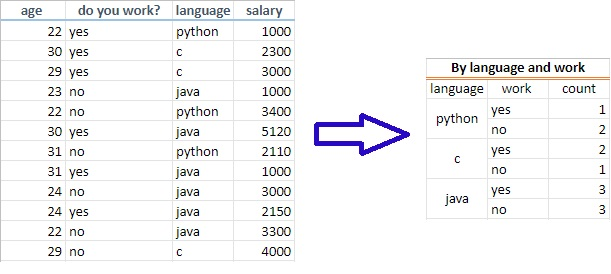

In [5]:
survey = {'age':[22,30,29,23,22,30,31,31,24,24,22,29],
         'work':['yes','yes','yes','no','no','yes','no','yes','no','yes',"no",'no'],
         'language':['python','c','c','java','python','java','python','java','java','java','java','c'],
         'salary':[1000,2300,3000,1000,3400,5120,2110,1000,3000,2150,3300,4000]}

In [6]:
survey = pd.DataFrame(survey)

In [7]:
survey

,age,work,language,salary
0,22,yes,python,1000
1,30,yes,c,2300
2,29,yes,c,3000
3,23,no,java,1000
4,22,no,python,3400
5,30,yes,java,5120
6,31,no,python,2110
7,31,yes,java,1000
8,24,no,java,3000
9,24,yes,java,2150


In [8]:
print(survey['age'].mean())
print(survey['salary'].median())
print(survey['salary'].std())

26.416666666666668
2650.0
1278.1485188989723


In [9]:
survey['work'].value_counts()

no     6
yes    6
Name: work, dtype: int64

In [10]:
lang_grp = survey.groupby('language')

In [37]:
lang_grp['work'].value_counts()

language  work
c         yes     2
          no      1
java      no      3
          yes     3
python    no      2
          yes     1
Name: work, dtype: int64

## By age and language
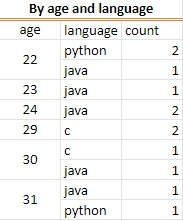

In [38]:
age_grp = survey.groupby('age')

In [39]:
age_grp['language'].value_counts()

age  language
22   python      2
     java        1
23   java        1
24   java        2
29   c           2
30   c           1
     java        1
31   java        1
     python      1
Name: language, dtype: int64

## Mean salary by language
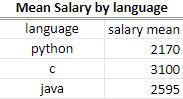

In [40]:
lang_grp['salary'].mean()

language
c         3100
java      2595
python    2170
Name: salary, dtype: int64

In [41]:
lang_grp['salary'].mean().loc['python']

2170

In [42]:
df.dropna()

NameError: name 'df' is not defined

# Handling Missing Values

In [43]:
survey = {'age':[22,np.nan,29,23,22,30,31,31,24,24,22,29],
         'work':['yes',np.nan,'yes','no','no',np.nan,'no','yes','Missing','yes',np.nan,'no'],
         'language':['python',None,'c','java','python','java','python','java',None,'java','java','c'],
         'salary':[1000,np.nan,3000,1000,3400,5120,'No Answer',1000,3000,None,3300,4000]}

In [44]:
survey = pd.DataFrame(survey)

In [45]:
survey

,age,work,language,salary
0,22.0,yes,python,1000
1,NaN,NaN,None,NaN
2,29.0,yes,c,3000
3,23.0,no,java,1000
4,22.0,no,python,3400
5,30.0,NaN,java,5120
6,31.0,no,python,No Answer
7,31.0,yes,java,1000
8,24.0,Missing,None,3000
9,24.0,yes,java,None


In [46]:
    survey.dropna()

,age,work,language,salary
0,22.0,yes,python,1000
2,29.0,yes,c,3000
3,23.0,no,java,1000
4,22.0,no,python,3400
6,31.0,no,python,No Answer
7,31.0,yes,java,1000
11,29.0,no,c,4000


In [47]:
survey.dropna(axis=0, how='any')

,age,work,language,salary
0,22.0,yes,python,1000
2,29.0,yes,c,3000
3,23.0,no,java,1000
4,22.0,no,python,3400
6,31.0,no,python,No Answer
7,31.0,yes,java,1000
11,29.0,no,c,4000


In [48]:
survey.dropna(axis=0, how='all')

,age,work,language,salary
0,22.0,yes,python,1000
2,29.0,yes,c,3000
3,23.0,no,java,1000
4,22.0,no,python,3400
5,30.0,NaN,java,5120
6,31.0,no,python,No Answer
7,31.0,yes,java,1000
8,24.0,Missing,None,3000
9,24.0,yes,java,None
10,22.0,NaN,java,3300


In [49]:
survey.dropna(axis=0, how='any', subset=['work', 'language'])

,age,work,language,salary
0,22.0,yes,python,1000
2,29.0,yes,c,3000
3,23.0,no,java,1000
4,22.0,no,python,3400
6,31.0,no,python,No Answer
7,31.0,yes,java,1000
9,24.0,yes,java,None
11,29.0,no,c,4000


In [50]:
survey.dropna(axis=0, how='all', subset=['work', 'language'])

,age,work,language,salary
0,22.0,yes,python,1000
2,29.0,yes,c,3000
3,23.0,no,java,1000
4,22.0,no,python,3400
5,30.0,NaN,java,5120
6,31.0,no,python,No Answer
7,31.0,yes,java,1000
8,24.0,Missing,None,3000
9,24.0,yes,java,None
10,22.0,NaN,java,3300


In [51]:
survey.dropna(axis=1, how='any')

""
0
1
2
3
4
5
6
7
8
9


## How to handle custom missing values?

In [61]:
survey.replace('No Answer', np.nan, inplace=True)
survey.replace('Missing', np.nan, inplace=True)

In [62]:
survey

,age,work,language,salary
0,22.000000,yes,python,1000.000000
1,26.090909,yes,NaN,2757.777778
2,29.000000,yes,c,3000.000000
3,23.000000,no,java,1000.000000
4,22.000000,no,python,3400.000000
5,30.000000,NaN,java,5120.000000
6,31.000000,no,python,2757.777778
7,31.000000,yes,java,1000.000000
8,24.000000,NaN,NaN,3000.000000
9,24.000000,yes,java,2757.777778


# Fill missing data (Imputation)

In [65]:
for column in survey.columns:
    if survey[column].dtype == 'float64':
        survey[column].fillna(value=survey[column].mean(), inplace=True)
        print(survey)
    else:
        survey[column].fillna(value=survey[column].mode(), inplace=True)
        


          age work language       salary
0   22.000000  yes   python  1000.000000
1   26.090909  yes      NaN  2757.777778
2   29.000000  yes        c  3000.000000
3   23.000000   no     java  1000.000000
4   22.000000   no   python  3400.000000
5   30.000000  NaN     java  5120.000000
6   31.000000   no   python  2757.777778
7   31.000000  yes     java  1000.000000
8   24.000000  NaN      NaN  3000.000000
9   24.000000  yes     java  2757.777778
10  22.000000  NaN     java  3300.000000
11  29.000000   no        c  4000.000000
          age work language       salary
0   22.000000  yes   python  1000.000000
1   26.090909  yes      NaN  2757.777778
2   29.000000  yes        c  3000.000000
3   23.000000   no     java  1000.000000
4   22.000000   no   python  3400.000000
5   30.000000  NaN     java  5120.000000
6   31.000000   no   python  2757.777778
7   31.000000  yes     java  1000.000000
8   24.000000  NaN      NaN  3000.000000
9   24.000000  yes     java  2757.777778
10  22.000000  N

In [64]:
survey.isna().sum()


age         0
work        3
language    2
salary      0
dtype: int64